<a href="https://colab.research.google.com/github/owoMarciN/Python/blob/main/Intro-AI/Lab-IV/AI_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
!pip install torch

In [4]:
# SciKit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [5]:
# Dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

In [7]:
# Ploting
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [56]:
X = data["data"]
y = data["target"]
feature_names = data["feature_names"]
target_names = data["target_names"]

df = pd.DataFrame(X, columns=feature_names)
df["target"] = y # 0 = malignant, 1 = benign (or vice versa depending on version)

print(df.head())
print("Features:", feature_names)
print("Targets:", target_names)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [9]:
def diagnostic_agent(mean_radius, mean_texture, mean_radius_threshold, mean_texture_threshold):
  """Very simple agent: uses estimated thresholds."""

  # Example rule: large radius and texture -> likely malignant
  if mean_radius > mean_radius_threshold and mean_texture > mean_texture_threshold:
      return "MALIGNANT"
  elif mean_radius < mean_radius_threshold and mean_texture < mean_texture_threshold:
      return "BENIGN"
  else:
      return "NEEDS MORE TESTS"


In [10]:
median_mean_radius = df['mean radius'].median()
median_mean_texture = df['mean texture'].median()

print(f"Median mean radius: {median_mean_radius}")
print(f"Median mean texture: {median_mean_texture}")

# Test with example values, using the calculated medians as thresholds
mr = 17.0
mt = 22.0
decision = diagnostic_agent(mr, mt, median_mean_radius, median_mean_texture)

print(f"\nFor mean radius = {mr} and mean texture = {mt}: {decision}")

Median mean radius: 13.37
Median mean texture: 18.84

For mean radius = 17.0 and mean texture = 22.0: MALIGNANT


In [11]:
def rule_based_diagnosis(f):
  """
  f is a dict of features, e.g.:

  f = {"mean_radius": 17.5, "worst_texture": 30.0, "worst_smoothness": 0.16}
  """

  actions = []

  if f["mean_radius"] > 15 and f["worst_texture"] > 25:
      actions.append("MALIGNANT (rule: high size & texture)")
  elif f["mean_radius"] < 12 and f["worst_smoothness"] < 0.2:
      actions.append("BENIGN (rule: low size & smooth)")
  else:
      actions.append("CONSULT_ML_MODEL")
  return actions

patient = {"mean_radius": 17.5, "worst_texture": 30.0, "worst_smoothness": 0.16}
print(rule_based_diagnosis(patient))

['MALIGNANT (rule: high size & texture)']


## Exercise
- Small rule-based expert layer on top of the ML classifier
- At least one fuzzy rule or Bayesian calculasion risk
- Apply K-means or PCA to analyze structure

# Deliver
- Problem formulation
- Methods (rules, fuzzy/Bayes, K-means/PCA)
- One figure/table + short interpretation
- 1-2 pages

In [57]:
# ---------------------------
# Imports
# ---------------------------
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Load dataset
# ---------------------------
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# Train ML classifier
# ---------------------------
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_scaled, y_train)

print("RandomForest Performance:")
print(classification_report(y_test, clf.predict(X_test_scaled)))

RandomForest Performance:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [48]:
def fuzzy_large(x, a, b):
    """
    Simple fuzzy membership function:
    returns 0 (not large) ... 1 (fully large)
    a = start of "large"
    b = fully "large"
    """
    if x <= a: return 0
    if x >= b: return 1
    return (x - a) / (b - a)


mean_radius_index = list(feature_names).index('mean radius')

median_mean_radius = df['mean radius'].median()

def fuzzy_risk_feature(sample, median_radius=median_mean_radius):
    radius = sample[mean_radius_index]
    return fuzzy_large(radius, a=median_radius*0.8, b=median_radius*1.2)

## $P(\text{malignant} | \text{large mean radius}) $

In [61]:
# Precompute priors from dataset
malignant = (y == 0)
benign = (y == 1)

mean_radius = X[:, mean_radius_index]

def bayesian_risk(sample, median_radius=median_mean_radius):
    radius = sample[mean_radius_index]
    is_large = radius > median_radius
    if not is_large:
        return 0.2

    # Example probabilities (can tune)
    p_large_given_malignant = 0.7
    p_large_given_benign = 0.3
    p_malignant = 0.37

    numerator = p_large_given_malignant * p_malignant
    denominator = numerator + p_large_given_benign * (1 - p_malignant)
    return numerator / denominator

In [62]:
def expert_rules(sample_original, ml_prob):
    fuzzy_score = fuzzy_risk_feature(sample_original)
    bayes_score = bayesian_risk(sample_original)

    # Expert rule combination
    expert_risk = 0.4*fuzzy_score + 0.6*bayes_score

    # Mix with ML model prediction
    final_risk = 0.7*ml_prob + 0.3*expert_risk

    decision = "Malignant" if final_risk > 0.5 else "Benign"

    return decision, final_risk, fuzzy_score, bayes_score

In [75]:
ml_prob = clf.predict_proba(X_test_scaled)[:, 0]  # probability of malignant

final_decisions = []
results = []

for i in range(len(X_test)):
    sample = X_test[i]
    ml = ml_prob[i]
    fuzzy_r = fuzzy_risk_feature(sample)
    bayes_r = bayesian_risk(sample)
    expert_r = 0.5*(fuzzy_r + bayes_r)
    final = 0.6*ml + 0.4*expert_r
    decision = "Malignant" if final > 0.5 else "Benign"
    final_decisions.append(0 if decision == "Malignant" else 1)
    results.append({
        "Sample": i,
        "ML_prob": ml,
        "Fuzzy_risk": fuzzy_r,
        "Bayes_risk": bayes_r,
        "Expert_risk": expert_r,
        "Final_risk": final,
        "Decision": decision
    })

# element-wise comparison
matches = [r==t for r,t in zip(final_decisions, y_test)]

# overall accuracy
accuracy = sum(matches)/len(matches)
print(f"Accuracy: {accuracy:.2%}")
print(results[1])

Accuracy: 95.61%
{'Sample': 1, 'ML_prob': np.float64(0.995), 'Fuzzy_risk': 1, 'Bayes_risk': 0.578125, 'Expert_risk': 0.7890625, 'Final_risk': np.float64(0.912625), 'Decision': 'Malignant'}


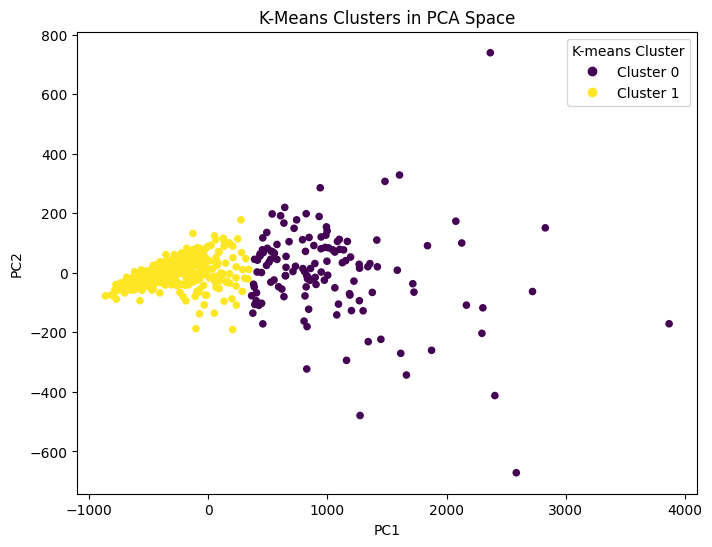

In [58]:
# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-means clustering assigning label: 0 or 1
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", s=20)
plt.title("K-Means Clusters in PCA Space")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Create legend entries manually
legend_labels = ["Cluster 0", "Cluster 1"]
colors = scatter.cmap(scatter.norm([0, 1]))

handles = [plt.Line2D([], [], marker='o', color=colors[i], linestyle='', label=legend_labels[i])
           for i in range(2)]

plt.legend(handles=handles, title="K-means Cluster")
plt.show()